<a href="https://colab.research.google.com/github/ParkEunbin/ML_basic/blob/main/210202_notMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 내가 가진 이미지를 사용하는 방법
1. 이미지 데이터를 구성하는 방법을 알고
2. 프로그램으로 이미지 데이터를 읽어들이는 코드의 사용법을 알고
3. 읽어들인 데이터의 형태를 안다면 사용가능!

### notMNIST :a~z 문자의 이미지

- 파일경로를 제대로 읽어들이기 : glob.blob('경로')
- 각각의 이미지는 사이지가 제각각 일텐데 이미지를 resizing해서 사용
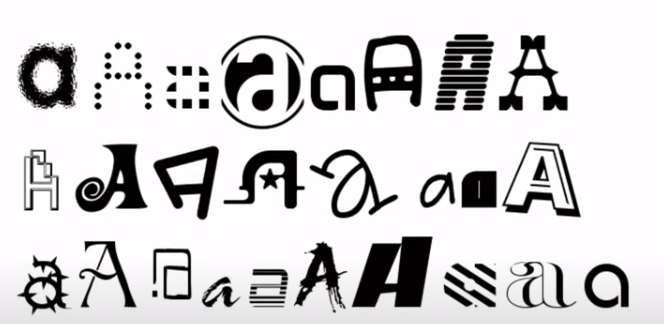

In [1]:
#sample로 파일을 받아 압축을 해제 
!wget -q https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/notMNIST_small.tar.gz
!tar -xzf notMNIST_small.tar.gz

In [8]:
# 이미지 읽어서 데이터 준비하기
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 경로를 모두 넣음
paths= glob.glob('./notMNIST_small/*/*.png')
# 이미지 경로를 셔플
paths= np.random.permutation(paths)
# 이미지를 읽어들임
독립= np.array([plt.imread(paths[i]) for i in range(len(paths))])
종속= np.array([paths[i].split('/')[2] for i in range(len(paths))])
print(독립.shape, 종속.shape)
#흑백이미지 > 3차원 이미지

(18724, 28, 28) (18724,)


In [9]:
종속[0:10]

array(['B', 'H', 'A', 'I', 'A', 'E', 'J', 'I', 'F', 'G'], dtype='<U1')

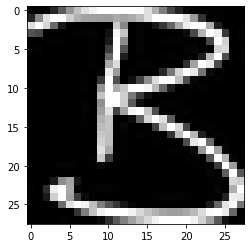

In [10]:
plt.imshow(독립[0],cmap='gray')

In [11]:
독립=독립.reshape(18724,28,28,1)
종속=pd.get_dummies(종속)
print(독립.shape,종속.shape)

(18724, 28, 28, 1) (18724, 10)


In [12]:
import tensorflow as tf

# 모델 만들기
X= tf.keras.layers.Input(shape=[28,28,1])

H= tf.keras.layers.Conv2D(6,kernel_size=5,padding='same',activation='swish')(X)
H= tf.keras.layers.MaxPool2D()(H)

H= tf.keras.layers.Conv2D(16,kernel_size=5,activation='swish')(H)
H=tf.keras.layers.MaxPool2D()(H)

H=tf.keras.layers.Flatten()(H)
H=tf.keras.layers.Dense(120,activation='swish')(H)
H=tf.keras.layers.Dense(84,activation='swish')(H)
Y=tf.keras.layers.Dense(10,activation='softmax')(H)

model= tf.keras.models.Model(X,Y)
model.compile(loss='categorical_crossentropy',metrics='accuracy')

In [13]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               4812

In [14]:
model.fit(독립,종속,epochs=10)

Epoch 1/10
586/586 [==============================] - 14s 22ms/step - loss: 0.7461 - accuracy: 0.7752
Epoch 2/10
586/586 [==============================] - 13s 22ms/step - loss: 0.2764 - accuracy: 0.9191
Epoch 3/10
586/586 [==============================] - 13s 22ms/step - loss: 0.2109 - accuracy: 0.9373
Epoch 4/10
586/586 [==============================] - 14s 23ms/step - loss: 0.1670 - accuracy: 0.9505
Epoch 5/10
586/586 [==============================] - 13s 22ms/step - loss: 0.1366 - accuracy: 0.9578
Epoch 6/10
586/586 [==============================] - 13s 22ms/step - loss: 0.1152 - accuracy: 0.9651
Epoch 7/10
586/586 [==============================] - 13s 22ms/step - loss: 0.0936 - accuracy: 0.9712
Epoch 8/10
586/586 [==============================] - 13s 22ms/step - loss: 0.0764 - accuracy: 0.9766
Epoch 9/10
586/586 [==============================] - 13s 23ms/step - loss: 0.0619 - accuracy: 0.9813
Epoch 10/10
586/586 [==============================] - 13s 23ms/step - loss: 0.054